Instructions

Apply the Random Forests algorithm but this time only by upscaling the data.
Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
categorical = pd.read_csv('/content/drive/MyDrive/Ironhack1/Week_7/Day_4/categorical.csv')
numerical = pd.read_csv('/content/drive/MyDrive/Ironhack1/Week_7/Day_4/numerical.csv')
targets = pd.read_csv('/content/drive/MyDrive/Ironhack1/Week_7/Day_4/target.csv')

data = pd.concat([numerical, categorical, targets], axis = 1)

#display(categorical.head())
#display(numerical.head())
#display(targets.head())
display(data.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [ ]:
data['AVGGIFT'].mean() #this is the average amount of money donated by the individual. The importance of this will be made clear. (13.3)

13.347785980847933

In [ ]:
data['TARGET_B'].value_counts() #we have class imbalance

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [ ]:
#dealing with class imbalance using upsampling. we are only upsampling the yes_donate, because its way less. now both are the same.
from sklearn.utils import resample

no_donate = data[data['TARGET_B'] == 0]
yes_donate = data[data['TARGET_B'] == 1]

yes_upsample = resample(yes_donate,
                        replace = True,
                        n_samples = len(no_donate),
                        random_state=42)

display(yes_upsample.shape)
display(no_donate.shape)

(90569, 339)

(90569, 339)

In [ ]:
upsample = pd.concat([yes_upsample, no_donate]) #concatenate

In [ ]:
#x,y split
y = upsample['TARGET_B']
X = upsample.drop(['TARGET_B'], axis = 1)

In [ ]:
#train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#we seperate the cats and the nums in the train and test sets
X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(include = np.number)

X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(include = np.number)


In [ ]:
#we apply the transformations. applying it first to the train using 1hotencoder and the test
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#train encoded
train_encoded = encoder.transform(X_train_cat).toarray()
train_encoded = pd.DataFrame(train_encoded)

#test encoded
test_encoded = encoder.transform(X_test_cat).toarray()
test_encoded = pd.DataFrame(test_encoded)

In [ ]:
#here we deal with the numericals by applying the standard scaler on train and test
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train_num)

#train scaled
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num))
#test scaled
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num))

In [ ]:
#placing everything together. we concatenate the train encoded with the train scaled, and the test encoded with the test scaled
train_treated = pd.concat([train_encoded, X_train_scaled], axis = 1)
test_treated = pd.concat([test_encoded, X_test_scaled], axis = 1)

#and here we place them together for our final concat
final_df = pd.concat([train_treated, test_treated], axis = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#here we create the model
clf = RandomForestClassifier(max_depth=3,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(train_treated, y_train)
pred = clf.predict(test_treated)
#print('Train score:')
#print(recall_score(y_train, pred))
print('Test recall score:')
print(recall_score(y_test, pred))
print('Test f1 score:')
print(f1_score(y_test, pred))

Test recall score:
0.9630021141649049
Test f1 score:
0.9630824871331201


AttributeError: ignored

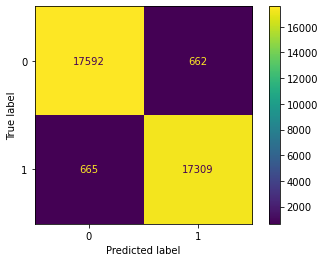

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

plot_confusion_matrix(clf, test_treated, y_test)
plt.show()

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [ ]:
# For cross validation.....takes a very long time, maybe don't run it. The output-value is written at the bottom of the cell for your convenience.
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

#output is 0.6119867503967981, therefore the predictive model performs accurately in practice.

0.6119867503967981


**Discuss the output and its impact in the bussiness scenario. **

- Is the cost of a false positive equals to the cost of the false negative? 
- How would you change your algorithm or data in order to maximize the return of the bussiness?

The cost of the false negatives would be more damaging due to the fact that less people will be targeted with the fundraising requests and therefore won't contribute financially to the campaign. To be more specific, we have calculated that the average donation is 13.3 (Dollars). If you multiply this by 665 false negatives, we get a value of missed donations amounting to $8,844. 

The algorithm must be changed in a way so it minimizes the losses by aiming to reduce the number of false negatives.